In [1]:
!wget https://bit.ly/fruits_300_data -O fruits_300_data.npy

--2021-12-23 08:44:04--  https://bit.ly/fruits_300_data
Resolving bit.ly (bit.ly)... 67.199.248.10, 67.199.248.11
Connecting to bit.ly (bit.ly)|67.199.248.10|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://github.com/rickiepark/hg-mldl/raw/master/fruits_300.npy [following]
--2021-12-23 08:44:04--  https://github.com/rickiepark/hg-mldl/raw/master/fruits_300.npy
Resolving github.com (github.com)... 140.82.113.4
Connecting to github.com (github.com)|140.82.113.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/rickiepark/hg-mldl/master/fruits_300.npy [following]
--2021-12-23 08:44:04--  https://raw.githubusercontent.com/rickiepark/hg-mldl/master/fruits_300.npy
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... conne

In [2]:
import numpy as np

fruits = np.load('fruits_300_data.npy')
fruits_2d = fruits.reshape(-1,100*100)

In [4]:
from sklearn.decomposition import PCA

pca = PCA(n_components=50)
pca.fit(fruits_2d)
print(pca.components_.shape) # 주성분

(50, 10000)


In [9]:
# 참고 : k_means.ipynb
from numpy.core.fromnumeric import squeeze
import matplotlib.pyplot as plt

def draw_fruits(arr,ratio=1):
  n=len(arr)
  rows = int(np.ceil(n/10))
  cols = n if rows<2 else 10
  fig,axs = plt.subplots(rows,cols,figsize=(cols*ratio,rows*ratio),squeeze=False)

  for i in range(rows):
    for j in range(cols):
      if i*10+j < n:
        axs[i,j].imshow(arr[i*10+j],cmap='gray_r')
      axs[i,j].axis('off')
  plt.show()

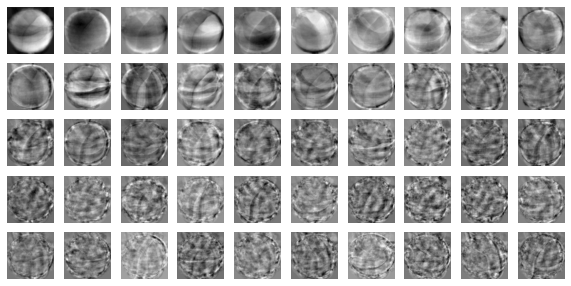

In [10]:
draw_fruits(pca.components_.reshape(-1,100,100)) # 원본 데이터에서 분산이 큰 방향순으로 출력

In [11]:
print(fruits_2d.shape)

(300, 10000)


In [14]:
fruits_pca = pca.transform(fruits_2d) # 특성의 개수 50개로 줄이기
print(fruits_pca.shape)

(300, 50)


In [16]:
fruits_inverse = pca.inverse_transform(fruits_pca) # 줄인 데이터 10000개로 복원
print(fruits_inverse.shape)

(300, 10000)


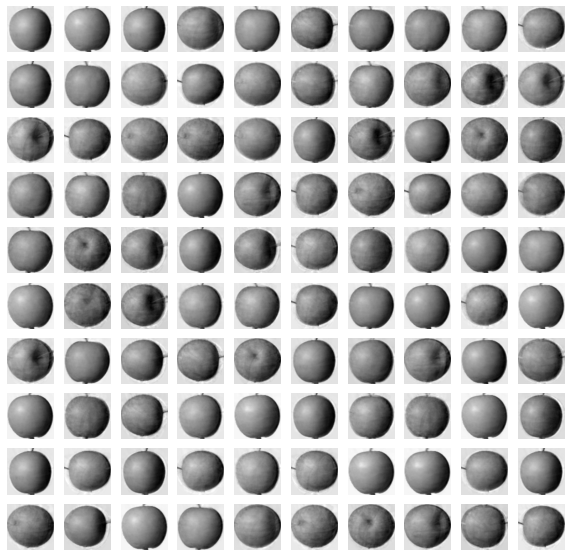

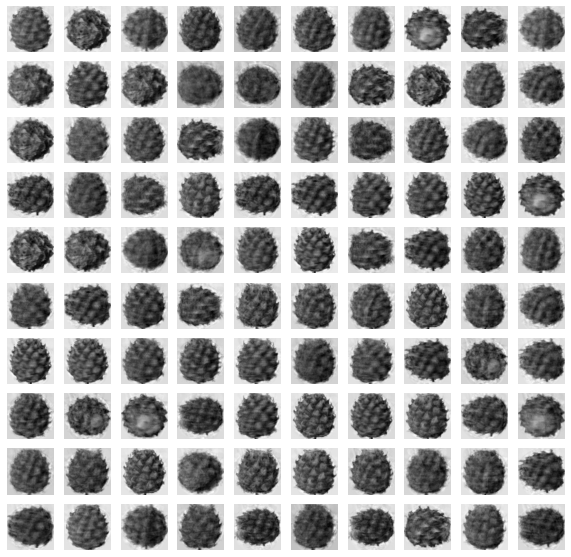

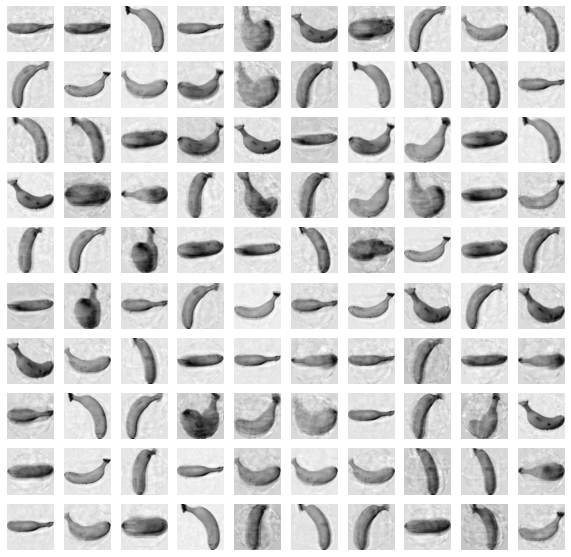

In [17]:
fruits_reconstruct = fruits_inverse.reshape(-1,100,100)
for start in [0,100,200]:
  draw_fruits(fruits_reconstruct[start:start+100])
  print("\n")

In [18]:
print(np.sum(pca.explained_variance_ratio_)) # 설명된 분산의 합

0.9215604527431135


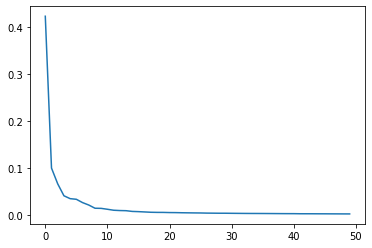

In [20]:
plt.plot(pca.explained_variance_ratio_)
plt.show()

## 다른 알고리즘과 함께 사용하기

In [22]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
target = np.array([0]*100+[1]*100+[2]*100) # 사과:0, 파인애플:1, 바나나:2

In [23]:
from sklearn.model_selection import cross_validate

scores = cross_validate(lr,fruits_2d,target) # 원본으로 테스트
print(np.mean(scores['test_score']))
print(np.mean(scores['fit_time']))

0.9966666666666667
1.7947658538818358


In [24]:
scores = cross_validate(lr,fruits_pca,target) # 축소한 데이터로 테스트
print(np.mean(scores['test_score']))
print(np.mean(scores['fit_time']))

1.0
0.029256105422973633


In [25]:
pca = PCA(n_components=0.5) # 분산의 비율로 주성분 설정
pca.fit(fruits_2d)

PCA(n_components=0.5)

In [26]:
print(pca.n_components_) # 2개의 주성분 특성만으로 분산의 50% 표현

2


In [27]:
fruits_pca = pca.transform(fruits_2d)
print(fruits_pca.shape)

(300, 2)


In [28]:
scores = cross_validate(lr,fruits_pca,target)
print(np.mean(scores['test_score']))
print(np.mean(scores['fit_time']))

0.9933333333333334
0.05283446311950683


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


In [30]:
from sklearn.cluster import KMeans

km = KMeans(n_clusters=3,random_state=42)
km.fit(fruits_pca)
print(np.unique(km.labels_,return_counts=True))

(array([0, 1, 2], dtype=int32), array([110,  99,  91]))


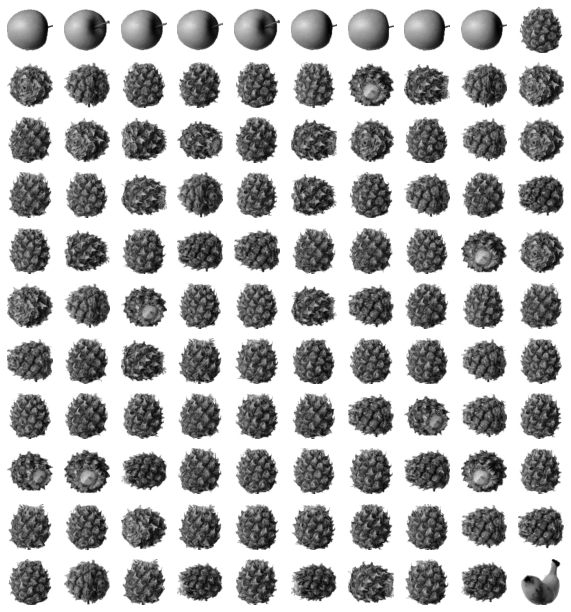

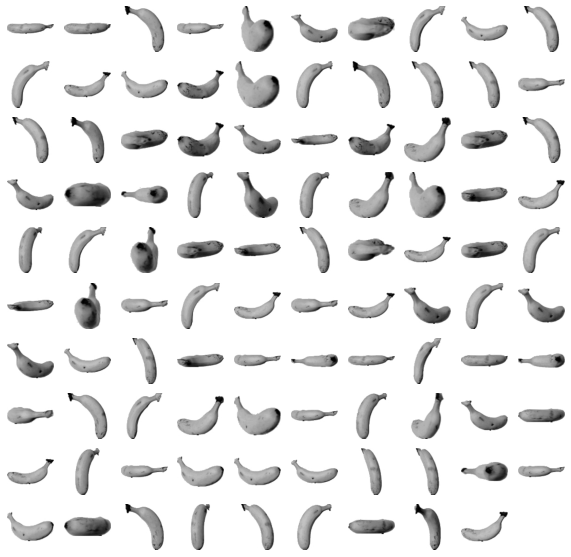

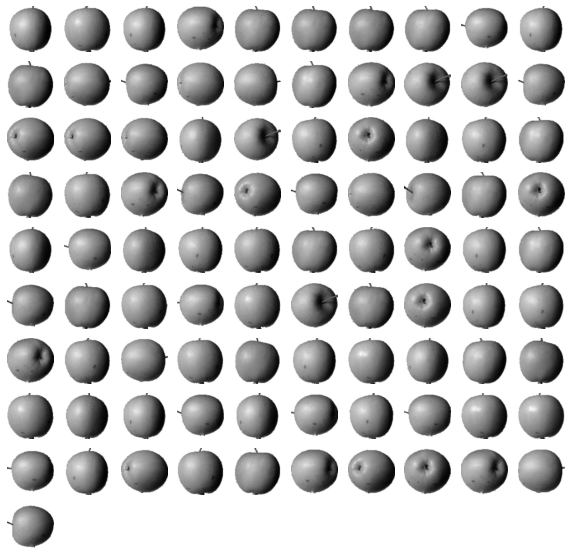

In [31]:
for label in range(0,3):
  draw_fruits(fruits[km.labels_ == label])
  print("\n")

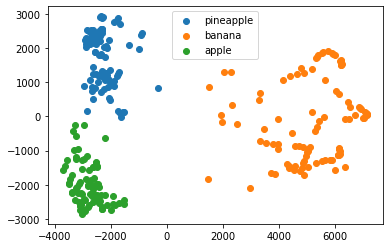

In [32]:
for label in range(0,3):
  data = fruits_pca[km.labels_ == label]
  plt.scatter(data[:,0],data[:,1]) # 산점도로 표현

plt.legend(['pineapple','banana','apple'])
plt.show()